## Practice for final assignment ##

For most of this tutorial, I will be giving you opportunities to ask questions. But, I just wanted to show you an example of how you might go about some of the coding for the assignment.

I'm going to introduce you to a dataset about cancer treatments. We are going to examine the likelihood of an individual's cancer going into remission. This will be a patient of individuals nested within doctors. This will allow us to examine whether certian doctors are better at treating cancerous patients in different situations.

In [2]:
install.packages('lmerTest')
install.packages('margins')
library(lme4)
library(lmerTest)
library(lattice)
library(margins)
library(sjPlot)
library(stargazer)
library(ggplot2)
#So, the final assignment is focused on non-linear multi-level models.
#We are going to use a sample dataset from the lme4 package
#Often packages can have useful data on which you can practice any methods you might want to implement

#Let's take this data from UCLA's data
hdp <- read.csv("https://stats.idre.ucla.edu/stat/data/hdp.csv")
hdp <- within(hdp, {
  Married <- factor(Married, levels = 0:1, labels = c("no", "yes"))
  DID <- factor(DID)
  HID <- factor(HID)
  CancerStage <- factor(CancerStage)
})


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependency ‘prediction’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: Matrix

Warning message:
“package ‘Matrix’ was built under R version 4.2.3”

Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘lattice’ was built under R version 4.2.3”
Warning message:
“package ‘stargazer’ was built under R version 4.2.3”

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


First, let's do some descriptive statistics for this  dataset. This is a relatively simple process. It's a little bit different from your mid-term assignment because we have lots of different doctors to nest patients in. So, why don't we start with some summary statistics.

Below are some simple commands to create summary statistics.

'data.frame':	8525 obs. of  27 variables:
 $ tumorsize   : num  68 64.7 51.6 86.4 53.4 ...
 $ co2         : num  1.53 1.68 1.53 1.45 1.57 ...
 $ pain        : int  4 2 6 3 3 4 3 3 4 5 ...
 $ wound       : int  4 3 3 3 4 5 4 3 4 4 ...
 $ mobility    : int  2 2 2 2 2 2 2 3 3 3 ...
 $ ntumors     : int  0 0 0 0 0 0 0 0 2 0 ...
 $ nmorphine   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ remission   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ lungcapacity: num  0.801 0.326 0.565 0.848 0.886 ...
 $ Age         : num  65 53.9 53.3 41.4 46.8 ...
 $ Married     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 2 2 1 2 1 ...
 $ FamilyHx    : chr  "no" "no" "no" "no" ...
 $ SmokingHx   : chr  "former" "former" "never" "former" ...
 $ Sex         : chr  "male" "female" "female" "male" ...
 $ CancerStage : Factor w/ 4 levels "I","II","III",..: 2 2 2 1 2 1 2 2 2 2 ...
 $ LengthofStay: int  6 6 5 5 6 5 4 5 6 7 ...
 $ WBC         : num  6088 6700 6043 7163 6443 ...
 $ RBC         : num  4.87 4.68 5.01 5.27 4.98 ...
 $ BMI       


   0    1 
6004 2521 

,X....wound,X.....Age,X..Sex_fac,SmokingHx_fac
,<chr>,<chr>,<chr>,<chr>
X,Min. :1.000,Min. :26.32,female:5115,current:1705
X.1,1st Qu.:5.000,1st Qu.:46.69,male :3410,former :1705
X.2,Median :6.000,Median :50.93,NA,never :5115
X.3,Mean :5.732,Mean :50.97,NA,NA
X.4,3rd Qu.:7.000,3rd Qu.:55.27,NA,NA
X.5,Max. :9.000,Max. :74.48,NA,NA



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Apr 02, 2024 - 12:10:26 AM
\begin{table}[!htbp] \centering 
  \caption{Summary of the dataset for this file} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
Statistic & \multicolumn{1}{c}{N} & \multicolumn{1}{c}{Mean} & \multicolumn{1}{c}{St. Dev.} & \multicolumn{1}{c}{Min} & \multicolumn{1}{c}{Max} \\ 
\hline \\[-1.8ex] 
wound & 8,525 & 5.732 & 1.525 & 1 & 9 \\ 
Age & 8,525 & 50.972 & 6.275 & 26.323 & 74.482 \\ 
\hline \\[-1.8ex] 
\end{tabular} 
\end{table} 



  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
252 202 227 377 135 356 322 224 302 174 157 213 312 255 276 261 243 307 248 211 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35 
208 134 246 209 293 222 153 229 300 217 219 291 271 183 296 


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 28  32   6  30  18  34  27  32  23  22  32   2  20  30  29  20  35  19  11   4 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  5  14  22  27  17  37  13  19  14  27  12  20  31   5  36  15  34  15  15  20 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 36  35  17  32  39  18  29  17  14  31   9  29   6  11   7  11   4  27  36  32 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 33  19  17  33  25  27  15  12  40  26  10   7  20  38  25  40  30  15  18   7 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2  29   6  19  26  40  21  20   8  31  19  21  10  10  25  24   5   3  27  38 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
 25  23  22  40  21  28  25  11  12  30  19   8  31   6  35  25  23  14  19  21 
121 122 123 124 125 126 127


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




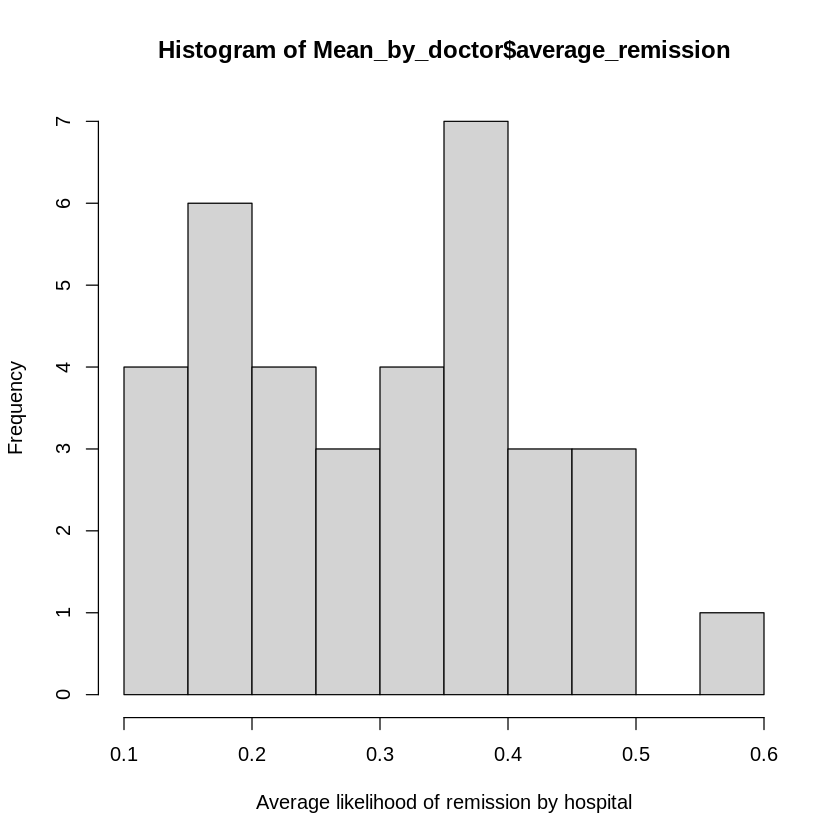

In [3]:
str(hdp)
table(hdp$remission)
hdp$Sex_fac <- factor(hdp$Sex)
hdp$SmokingHx_fac <- factor(hdp$SmokingHx)
hdp_summary <- data.frame(unclass(summary(hdp[, c('wound', 'Age', 'Sex_fac', 'SmokingHx_fac')])))
hdp_summary
#Cool, now let's export those descriptive stats
stargazer(hdp[, c('wound', 'Age', 'Sex_fac', 'SmokingHx_fac')], summary = T, out = 'summary.html', title = 'Summary of the dataset for this file')


table(hdp$HID)
table(hdp$DID)
#Right, we've done that. Why don't we do something else as well.
#Let's put graph the remission rate by doctor and see if we find anything

library(dplyr)

Mean_by_doctor <- hdp %>% group_by(HID) %>% summarise(average_remission = mean(remission), .groups = 'drop')
hist(Mean_by_doctor$average_remission, xlab = 'Average likelihood of remission by hospital')


Descriptive statistics revela more women than men. There are also quite a few current/former smokers in the group compared to national averages. The sample also seems to suggest a relatively old sample with a mean age of around 51.

Now that we have done some descriptive statistics, we can get on to the inferential models.
So, let's take a look at a couple.

Let's start out with a variance component model.
This is a bit tricky to interpret so it's important to consider the model carefully.

Why not run a linear probability model as well?
So, we can do that too.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: remission ~ 1 | HID
   Data: hdp

     AIC      BIC   logLik deviance df.resid 
  9937.2   9951.3  -4966.6   9933.2     8523 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0824 -0.6960 -0.4812  1.0634  2.5451 

Random effects:
 Groups Name        Variance Std.Dev.
 HID    (Intercept) 0.3302   0.5746  
Number of obs: 8525, groups:  HID, 35

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.9115     0.1005  -9.069   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: remission ~ 1 | HID
   Data: hdp

REML criterion at convergence: 10399

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2163 -0.7388 -0.4246  1.2001  1.9613 

Random effects:
 Groups   Name        Variance Std.Dev.
 HID      (Intercept) 0.01334  0.1155  
 Residual             0.19587  0.4426  
Number of obs: 8525, groups:  HID, 35

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.30014    0.02014 33.86847   14.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


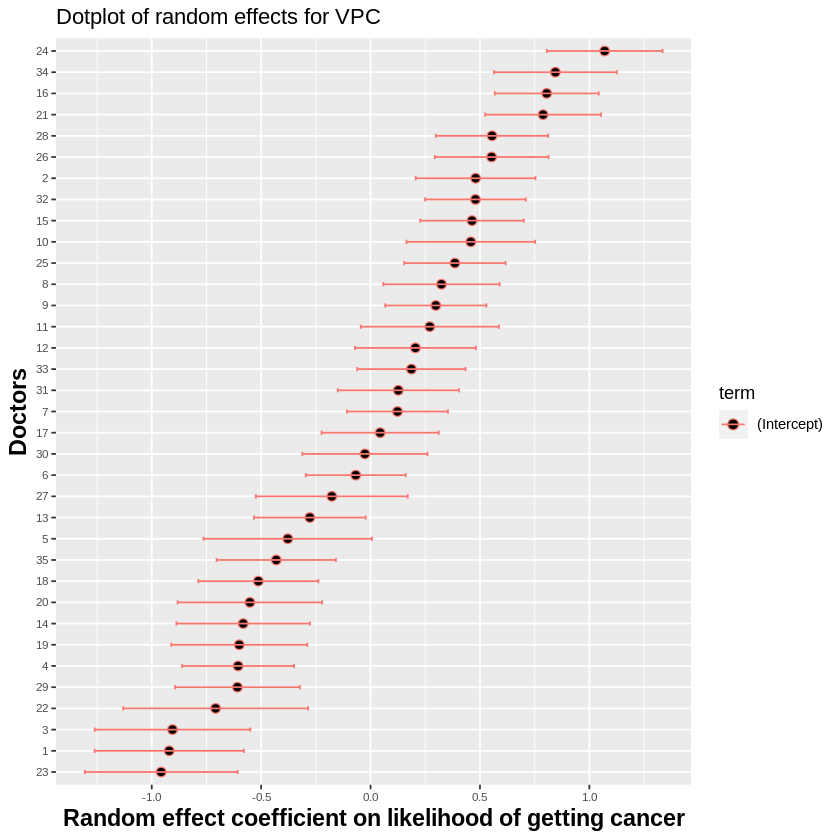

In [5]:
#So, we are starting this analysis with a logistic variance decomposition model. 

VC_mod <- glmer(remission ~ 1|HID, data = hdp, family = binomial(link = 'logit'))
summary(VC_mod)

VC_lmod <- lmer(remission ~ 1|HID, data = hdp)
summary(VC_lmod)

REs <- as.data.frame(ranef(VC_mod))


#Now, some of the names are a bit odd here but nicely for us, these names will be constant no matter what we do
#The names mean the following: grpvar is the variable being grouped, term is the name of the coefficient, grp is the group being identified, condval is the value taken by the random effect, and condre is the standard error
 ggplot(REs, aes(x=condval, y= grp , color = term)) + ggtitle('Dotplot of random effects for VPC') +xlab('Random effect coefficient on likelihood of getting cancer') +ylab('Doctors')+
   geom_dotplot(binaxis='y', stackdir='center',
                stackratio=1.5, dotsize=0.4) + 
   geom_errorbar(aes(xmin = condval- (1.96 * condsd),
                     xmax = condval+ (1.96 * condsd)), width = 0.2, position = position_dodge(0.9))+
  theme(axis.text=element_text(size=7), axis.title=element_text(size=14,face="bold"))


Remember that we can caclualte a VPC model by using $\frac{\pi^{2}}{{3}}$ as an estimate for the residual because of the way multi-level logistic regression works. But, it's important that we caveat this. This suggests that the variance partition coefficient (VPC) of the model. So, calculate it yourself and compare the VPC for both the linear and the logitsic models.

So, the problem with the above dotplot is that it's hard to interpret. I probably wouldn't use it in this case but just s you can see how it applies. The doctors are obviously anonymous so, it's hard to interpret the the model, apart from the fact that there is a lot of difference at the doctor level but generally, the best way to show that is the VPC. It's an extra support so that's nice but that's all really.

But, for your assignment, you guys want to interpret hypotheses and the models above aren't that useful for that.
So, presumably a person would now look up some interesting ideas from the literature which are related to whether individuals with cancer go into remission.

I am going to run a model with 6 independent variables. But, let's focus on the smoking variable.
There is plenty of data indicating whether indiviual's get cancer depending on their smoking habits. The Surgeon's general reports in the US have consistently indicated that smoking is bad for you. Therefore, it is essential that we start to consider what effect it has on the likelihood of remmission.






In [8]:
#For our multi-level model, we need to centre the Age variable

hdp$Age_cen <- scale(hdp$Age, scale = F)
hdp$Age_cen_100 <- hdp$Age_cen/100

Rem_ml_mod <- glmer(remission ~ wound +  Age_cen_100 + Sex + BMI + Experience + SmokingHx + (1|HID), data = hdp, 
                    family = binomial(link = 'logit'))
summary(Rem_ml_mod)

#If we want marginal effects, this is how we do it
mfx_Rem_ml_mod <- margins(Rem_ml_mod )
summary(mfx_Rem_ml_mod )

stargazer(mfx_Rem_ml_mod, summary = T, out = 'MFX.html')

#If we want an odds ratio, this is relatively simpl
#We can just use the exponential function

#We can do that ourselves


Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
remission ~ wound + Age_cen_100 + Sex + BMI + Experience + SmokingHx +  
    (1 | HID)
   Data: hdp

     AIC      BIC   logLik deviance df.resid 
  9659.3   9722.7  -4820.6   9641.3     8516 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8200 -0.6504 -0.4713  1.0019  4.7584 

Random effects:
 Groups Name        Variance Std.Dev.
 HID    (Intercept) 0.3254   0.5704  
Number of obs: 8525, groups:  HID, 35

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -2.881957   0.241296 -11.944  < 2e-16 ***
wound            0.066468   0.018365   3.619 0.000295 ***
Age_cen_100     -3.554894   0.416168  -8.542  < 2e-16 ***
Sexmale          0.023526   0.053119   0.443 0.657842    
BMI             -0.002059   0.003779  -0.545 0.585829    
Experience       0.096611   0.006863  14.076  < 2e-16 ***
SmokingHxformer -0.

,factor,AME,SE,z,p,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Age_cen_100,-0.6740135374,0.0809038882,-8.3310401,8.013517e-17,-0.832582244,-0.515444830
2,BMI,-0.0003904357,0.0007166441,-0.5448111,5.858834e-01,-0.001795032,0.001014161
3,Experience,0.0183176763,0.0013852021,13.2238293,6.392483e-40,0.015602730,0.021032623
4,Sexmale,0.0044644028,0.0100897662,0.4424684,6.581503e-01,-0.015311176,0.024239981
5,SmokingHxformer,-0.0186888090,0.0150940517,-1.2381572,2.156578e-01,-0.048272607,0.010894989
6,SmokingHxnever,-0.0275381667,0.0128949724,-2.1355739,3.271416e-02,-0.052811848,-0.002264485
7,wound,0.0126024328,0.0034914403,3.6095226,3.067610e-04,0.005759336,0.019445530



% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Tue, Apr 02, 2024 - 12:15:22 AM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}} ccccccccccccccccccccccccccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & remission & wound & Age\_cen\_100 & Sex & BMI & Experience & SmokingHx & HID & fitted & se.fitted & dydx\_wound & dydx\_Age\_cen\_100 & dydx\_BMI & dydx\_Experience & dydx\_Sexmale & dydx\_SmokingHxformer & dydx\_SmokingHxnever & Var\_dydx\_wound & Var\_dydx\_Age\_cen\_100 & Var\_dydx\_BMI & Var\_dydx\_Experience & Var\_dydx\_Sexmale & Var\_dydx\_SmokingHxformer & Var\_dydx\_SmokingHxnever & \_weights & \_at\_number \\ 
\hline \\[-1.8ex] 
1 & $0$ & $4$ & $0.140$ & male & $24.144$ & $25$ & former & 1 & $0.152$ & $$ & $0.009$ & $$-$0.459$ & $$-$0.0003$ & $0.012$ & $0.003$ & $$-$0.013$ & $$-$0.019$ & $0.00001$ & $0.007$ & $0.00000$ & $0.00000$ & $0.0001$ & $0.0002$ 

Right, so to interpret this model, it is relatively simple. We just interpret the fixed effects as usual.

Now, let's consider a random slope model. We know that people are generally less healthy and less likely to recover if they are in random slope models.

Second, I think that the effect nested within doctors is an important consideration. Some hosptals may be better at treating people who are older. So, let's consider that.

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
remission ~ wound + Age_cen_100 + Sex + BMI + Experience + SmokingHx +  
    (1 + Experience | HID)
   Data: hdp

     AIC      BIC   logLik deviance df.resid 
  9348.8   9426.3  -4663.4   9326.8     8514 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1304 -0.6301 -0.4288  0.8672  6.8368 

Random effects:
 Groups Name        Variance Std.Dev. Corr 
 HID    (Intercept) 6.53584  2.5565        
        Experience  0.01978  0.1406   -0.97
Number of obs: 8525, groups:  HID, 35

Fixed effects:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.261641   0.495118  -6.588 4.47e-11 ***
wound            0.084927   0.019736   4.303 1.68e-05 ***
Age_cen_100     -3.784077   0.427769  -8.846  < 2e-16 ***
Sexmale          0.001527   0.054700   0.028   0.9777    
BMI             -0.001617   0.003870  -0.418   0.6761    
Experien

Data were 'prettified'. Consider using `terms="Age_cen_100 [all]"` to
  get smooth plots.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


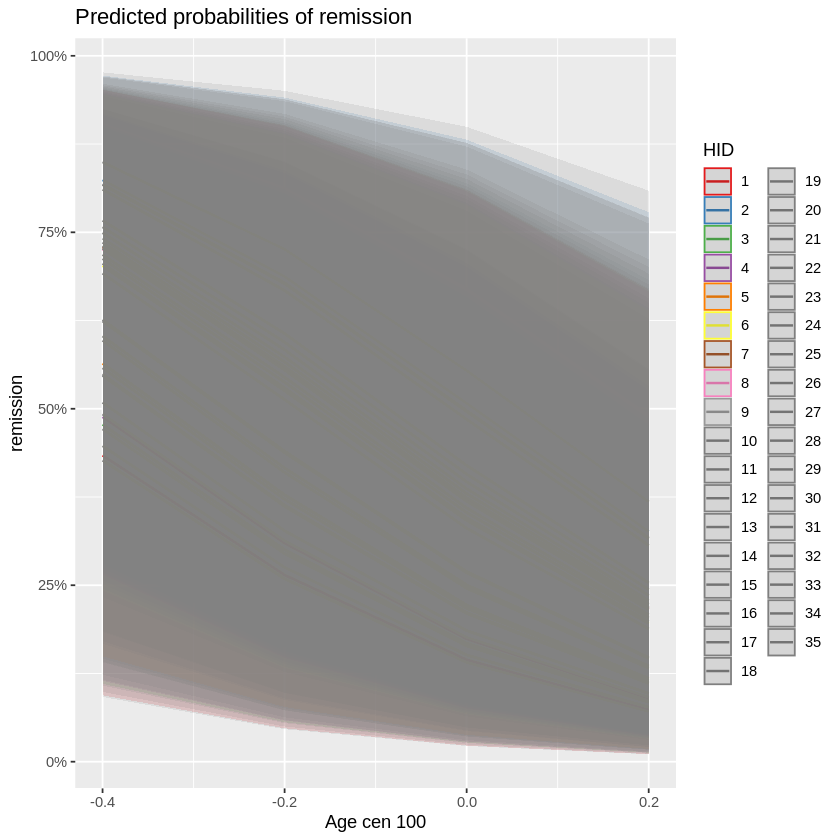

Data were 'prettified'. Consider using `terms="Age_cen_100 [all]"` to
  get smooth plots.

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Set1 is 9
Returning the palette you asked for with that many colors
”


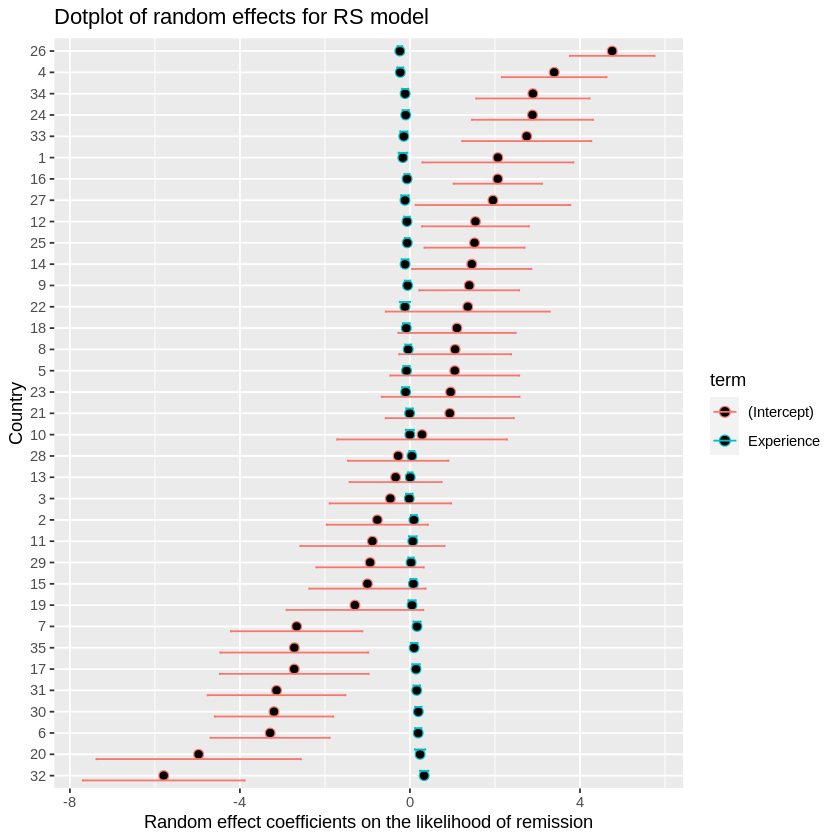

[1] "grpvar"  "term"    "grp"     "condval" "condsd"

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


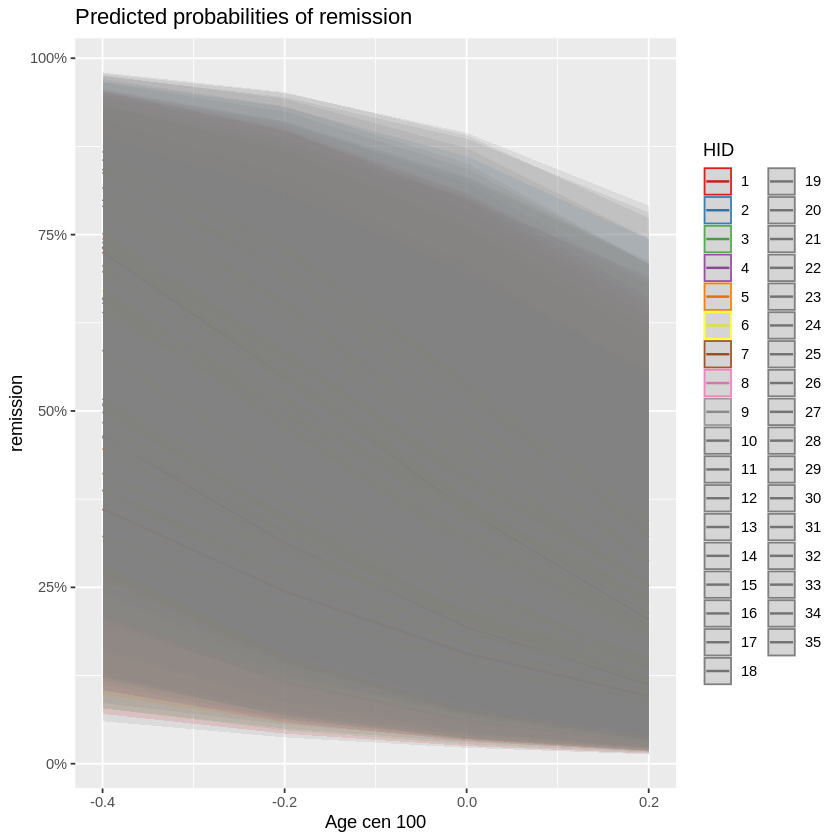

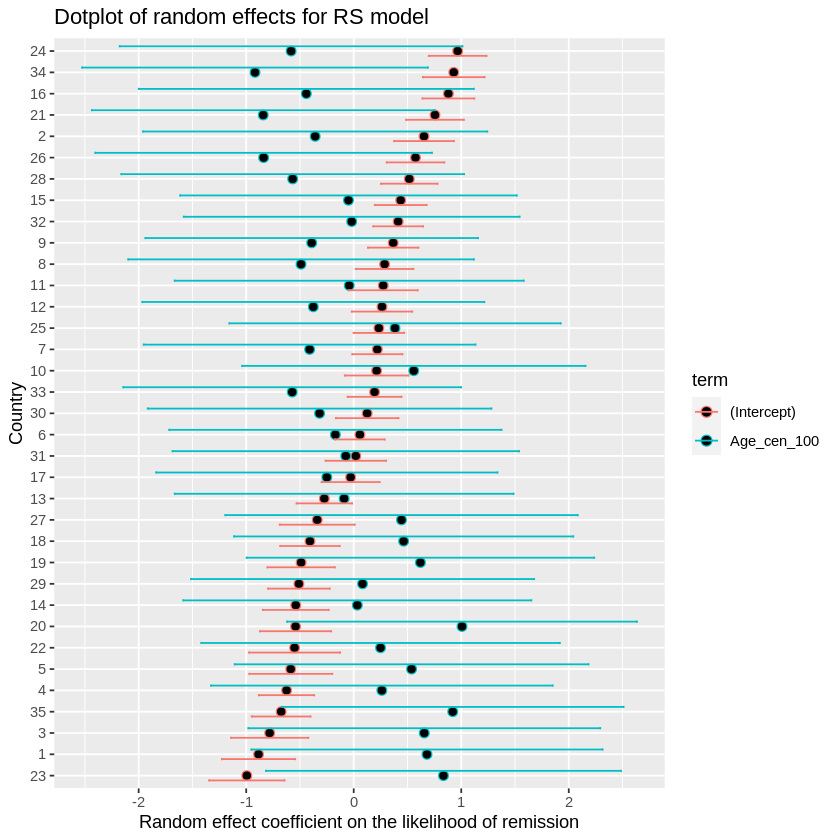

In [12]:
#Now, let's examine a random slope model

#Let's do one on the impact of Experience within doctors.
#Some doctors Experience might be really important for their practice
Rem_rs_mod <- glmer(remission ~ wound +  Age_cen_100 + Sex + BMI + Experience + SmokingHx + (1+Experience|HID), data = hdp, 
                    family = binomial(link = 'logit'))


summary(Rem_rs_mod)


#Now let's take a look at Age. Are some doctors beter at treating older people?
REffs <- ranef(Rem_rs_mod)
data_re_mlm1 <- as.data.frame(REffs)
plot_model (Rem_rs_mod, type="pred", terms = c("Age_cen_100", "HID"), pred.type = c("re")) 


 ggplot(data_re_mlm1, aes(x=condval, y= grp , color = term)) + ggtitle('Dotplot of random effects for RS model') +xlab('Random effect coefficients on the likelihood of remission') +ylab('Country')+
   geom_dotplot(binaxis='y', stackdir='center',
                stackratio=1.5, dotsize=0.4) + 
   geom_errorbar(aes(xmin = condval- (1.96 * condsd),
                     xmax = condval+ (1.96 * condsd)), width = 0.2, position = position_dodge(0.9))


#We can do an alternative random effects model for age
Rem_rs_age_mod <- glmer(remission ~ wound +  Age_cen_100 + Sex + BMI + Experience + SmokingHx + (1+Age_cen_100|HID), data = hdp, 
                        family = binomial(link = 'logit'))




REffs_age <- ranef(Rem_rs_age_mod)

plot_model (Rem_rs_age_mod, type="pred", terms = c("Age_cen_100", "HID"), pred.type = c("re")) 

#Since, this is all standardised, it is easy to just create a similar plot for model 2
data_re_mlm2 <- as.data.frame(REffs_age)
names(data_re_mlm2)

 ggplot(data_re_mlm2, aes(x=condval, y= grp , color = term)) + ggtitle('Dotplot of random effects for RS model') +xlab('Random effect coefficient on the likelihood of remission') +ylab('Country')+
   geom_dotplot(binaxis='y', stackdir='center',
                stackratio=1.5, dotsize=0.4) + 
   geom_errorbar(aes(xmin = condval- (1.96 * condsd),
                     xmax = condval+ (1.96 * condsd)), width = 0.2, position = position_dodge(0.9))

To interpret the random slope models, we are going to do what we normally do. We just have an opportunity to examine how random effects vary by other factors. So, why don't you see if you can interpret some of the fixed effects from the above models.

What is the effect of smoking on likelihood of remission?

What is the effect of Age on likelihood of remission?

Remember, if we want to get interpretable values, it might be appropriate to use odds ratios or marginal effects.



Now, the last thing to test for is the assumptions of the model. So, in this case, there is no need to look at heteroskedasticity like in linear models. But, we can still examine VIF. Second, it can be usefult to llok at residuals for outliers.

In [16]:
library(car)
#Test for multicollinearity is vif score
#If it's over 5, there's evidence of multicollinearity
vif(Rem_rs_age_mod)

Res_mod <- residuals(Rem_rs_age_mod)


,GVIF,Df,GVIF^(1/(2*Df))
wound,1.162010,1,1.077966
Age_cen_100,1.062923,1,1.030982
Sex,1.093364,1,1.045641
BMI,1.001476,1,1.000738
Experience,1.109267,1,1.053217
SmokingHx,1.099290,2,1.023948
